# Logistic Regression Exercise Solution

### Background

You will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/ex2data1.txt', header=None, 
                   names=['exam_one', 'exam_two', 'admitted'])
print(data.shape)
data.dtypes

(100, 3)


exam_one    float64
exam_two    float64
admitted      int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam_one    100 non-null float64
exam_two    100 non-null float64
admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
data.describe()

,exam_one,exam_two,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [7]:
data.admitted.sum()

60

In [8]:
data.head()

,exam_one,exam_two,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Our target, `admitted`, is a **binary** value.  A value of `1` means the student **was admitted** and a value of `0` means the student **was not admitted**.

Plotting the results in a scattter plot:

Text(0, 0.5, 'Exam 2 Score')

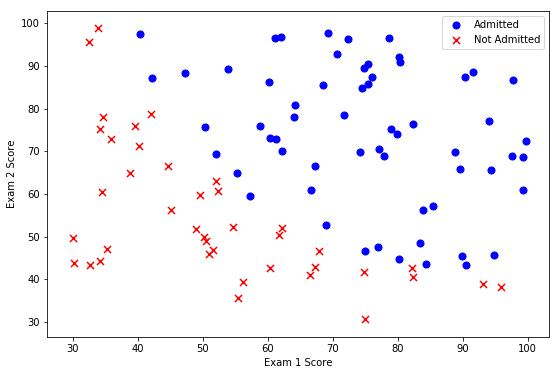

In [19]:
positive = data[data.admitted == 1]
negative = data[data.admitted == 0]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(positive['exam_one'], positive['exam_two'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam_one'], negative['exam_two'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

From this plot we can see that there’s a nearly linear decision boundary. We'll use a `logistic regression` algorithm to train a model to find the optimal decision boundary and make class predictions. The first step is to implement the `sigmoid function`.

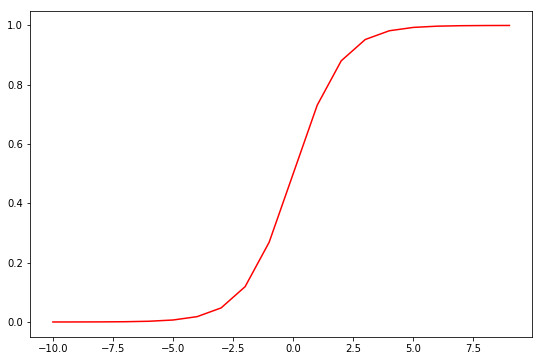

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(nums, sigmoid(nums), 'r');

This function is the “activation” function for the output of `logistic regression`. It converts a continuous input into a value between `0` and `1`. This value can be interpreted as the class probability, or the likelihood that the input example should be classified positively. Using this probability along with a threshold value, we can obtain a discrete label prediction. The plot visualizes the function’s output.

The next step is to write the `cost function`. It evaluates the performance of the model on the training data given a set of model parameters.

In [23]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

The function reduces the output down to a single scalar value, which is the sum of the “error” quantified as a function of the difference between the class probability assigned by the model and the true label of the example. The implementation is completely vectorized – it’s computing the model’s predictions for the whole data set in one statement (sigmoid(X * theta.T)).

To test the `cost function`:

In [24]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

# check the shape of the data structures to the values are sensible
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

Compute the cost for our initial solution given zeros for the model parameters, here represented as “theta”.

In [25]:
cost(theta, X, y)

0.6931471805599453

The next step is to write a function that computes the `gradient descent` of the model parameters to figure out how to change the parameters to improve the outcome of the model on the training data.

In [26]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

To calculate the optimal model parameters using Pythons SciPy package given our `cost` and `gradient` functions.

In [27]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

0.2034977015894744

Next we need to write a function that will output predictions for a dataset `X` using our learned parameters `theta`. We can then use this function to score the training accuracy of our classifier.

In [31]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


Our classifier predicted that a student was admitted 89% of the time.